In [2]:
import pandas as pd

targets = pd.read_csv('target.csv')
top_100_subgroups = pd.read_csv('top100_subgroups_min5.csv')

In [21]:
def get_members_from_subgroups(subgroups):
    list_of_member_lists = []
    for subgroup in subgroups['members']:
        member_list = []
        subgroup = subgroup.replace('[','').replace(']','').replace("'","").strip()
        for member in subgroup.split(','):
            member = member.strip()
            member_list.append(member)
        list_of_member_lists.append(member_list)
    return list_of_member_lists

top_100_members = get_members_from_subgroups(top_100_subgroups)
top_100_members

[['1476', '1374', '682', '460', '1196'],
 ['814',
  '306',
  '1259',
  '290',
  '467',
  '1311',
  '1297',
  '1376',
  '1721',
  '1366',
  '1320',
  '103',
  '1739'],
 ['467', '1660', '1643', '1297', '1320', '103', '1068'],
 ['290', '1721', '141', '1320', '1660', '305'],
 ['1476', '290', '1721', '103', '1660', '127'],
 ['1259', '467', '1297', '1147', '781', '127'],
 ['1476', '1821', '1660', '1320', '1147', '781'],
 ['1476', '102', '467', '1699', '1433', '1297', '870', '1423', '1147', '781'],
 ['290', '1320', '103', '1660', '127'],
 ['1259', '1476', '467', '1660', '127'],
 ['1476', '1433', '1320', '103', '127'],
 ['1476', '1259', '1821', '467', '1297', '1758', '127'],
 ['1476',
  '1374',
  '290',
  '656',
  '1660',
  '1142',
  '1311',
  '1758',
  '1443',
  '1721',
  '1320',
  '103',
  '1196',
  '982',
  '1068',
  '1739',
  '67',
  '127'],
 ['656', '318', '557', '1014', '1147', '781'],
 ['290', '35', '1694', '67', '751'],
 ['467',
  '318',
  '1297',
  '682',
  '1721',
  '1320',
  '103',


In [39]:
# for each member_list in top_100_members find the average days, % mature, average views, % partner using new_id as the key between the two dataframes

# days is a numeric column, so the average will give the average days
# mature is a binary column (True or False), so the average will give the percentage of mature content
# partner is a binary column (True or False), so the average will give the percentage of partner content
# views is a numeric column, so the average will give the average views

member_stats = []
for member_list in top_100_members:
    days = []
    mature = []
    views = []
    partner = []
    for member in member_list:
        member_data = targets[targets['new_id'] == int(member)]
        if not member_data.empty:
            days.append(member_data['days'].values[0])
            mature.append(member_data['mature'].values[0])
            views.append(member_data['views'].values[0])
            partner.append(member_data['partner'].values[0])
    avg_days = sum(days) / len(days) if days else 0
    avg_mature = sum(mature) / len(mature) if mature else 0
    avg_views = sum(views) / len(views) if views else 0
    avg_partner = sum(partner) / len(partner) if partner else 0
    member_stats.append({
        'avg_days': avg_days,
        'percent_mature': avg_mature*100,
        'avg_views': avg_views,
        'percent_partner': avg_partner*100
    })

member_stats_df = pd.DataFrame(member_stats)
member_stats_df

,avg_days,percent_mature,avg_views,percent_partner
0,1973.400000,0.000000,6.954056e+06,100.000000
1,2094.307692,0.000000,2.338369e+07,100.000000
2,2162.714286,14.285714,1.953552e+07,100.000000
3,2182.833333,16.666667,3.684320e+07,100.000000
4,2067.000000,0.000000,4.204745e+07,100.000000
...,...,...,...,...
95,1898.892857,17.857143,1.502839e+07,96.428571
96,1864.230769,25.641026,9.984969e+06,100.000000
97,1839.714286,14.285714,2.446928e+07,100.000000
98,1712.250000,8.333333,2.027715e+07,100.000000


In [41]:
member_stats_df.describe()

,avg_days,percent_mature,avg_views,percent_partner
count,100.000000,100.000000,1.000000e+02,100.000000
mean,1929.428841,14.875427,1.671768e+07,97.294051
std,147.001354,14.113136,1.090583e+07,5.697032
min,1587.400000,0.000000,8.271243e+05,66.666667
25%,1819.443182,0.000000,6.941769e+06,95.863636
50%,1928.366667,14.285714,1.496576e+07,100.000000
75%,2030.116883,20.000000,2.272837e+07,100.000000
max,2300.714286,60.000000,5.265634e+07,100.000000


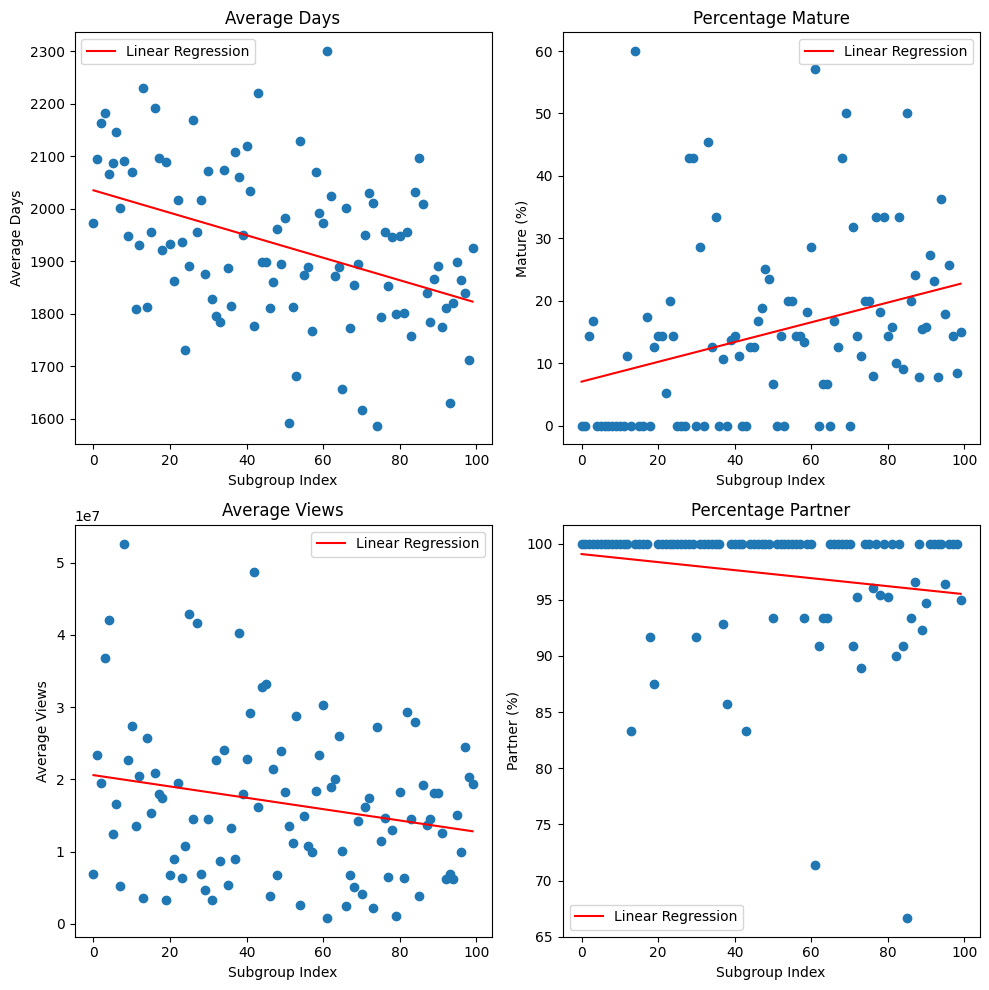

In [46]:
# make a dot plot for each of the four statistics with axis labels and linear regression
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot 1: Average Days
x1 = range(len(member_stats_df))
y1 = member_stats_df['avg_days']
axs[0, 0].scatter(x1, y1)
slope, intercept, r_value, p_value, std_err = linregress(x1, y1)
axs[0, 0].plot(x1, intercept + slope * np.array(x1), color='red', label='Linear Regression')
axs[0, 0].set_title('Average Days')
axs[0, 0].set_xlabel('Subgroup Index')
axs[0, 0].set_ylabel('Average Days')
axs[0, 0].legend()

# Plot 2: Percentage Mature
x2 = range(len(member_stats_df))
y2 = member_stats_df['percent_mature']
axs[0, 1].scatter(x2, y2)
slope, intercept, r_value, p_value, std_err = linregress(x2, y2)
axs[0, 1].plot(x2, intercept + slope * np.array(x2), color='red', label='Linear Regression')
axs[0, 1].set_title('Percentage Mature')
axs[0, 1].set_xlabel('Subgroup Index')
axs[0, 1].set_ylabel('Mature (%)')
axs[0, 1].legend()

# Plot 3: Average Views
x3 = range(len(member_stats_df))
y3 = member_stats_df['avg_views']
axs[1, 0].scatter(x3, y3)
slope, intercept, r_value, p_value, std_err = linregress(x3, y3)
axs[1, 0].plot(x3, intercept + slope * np.array(x3), color='red', label='Linear Regression')
axs[1, 0].set_title('Average Views')
axs[1, 0].set_xlabel('Subgroup Index')
axs[1, 0].set_ylabel('Average Views')
axs[1, 0].legend()

# Plot 4: Percentage Partner
x4 = range(len(member_stats_df))
y4 = member_stats_df['percent_partner']
axs[1, 1].scatter(x4, y4)
slope, intercept, r_value, p_value, std_err = linregress(x4, y4)
axs[1, 1].plot(x4, intercept + slope * np.array(x4), color='red', label='Linear Regression')
axs[1, 1].set_title('Percentage Partner')
axs[1, 1].set_xlabel('Subgroup Index')
axs[1, 1].set_ylabel('Partner (%)')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

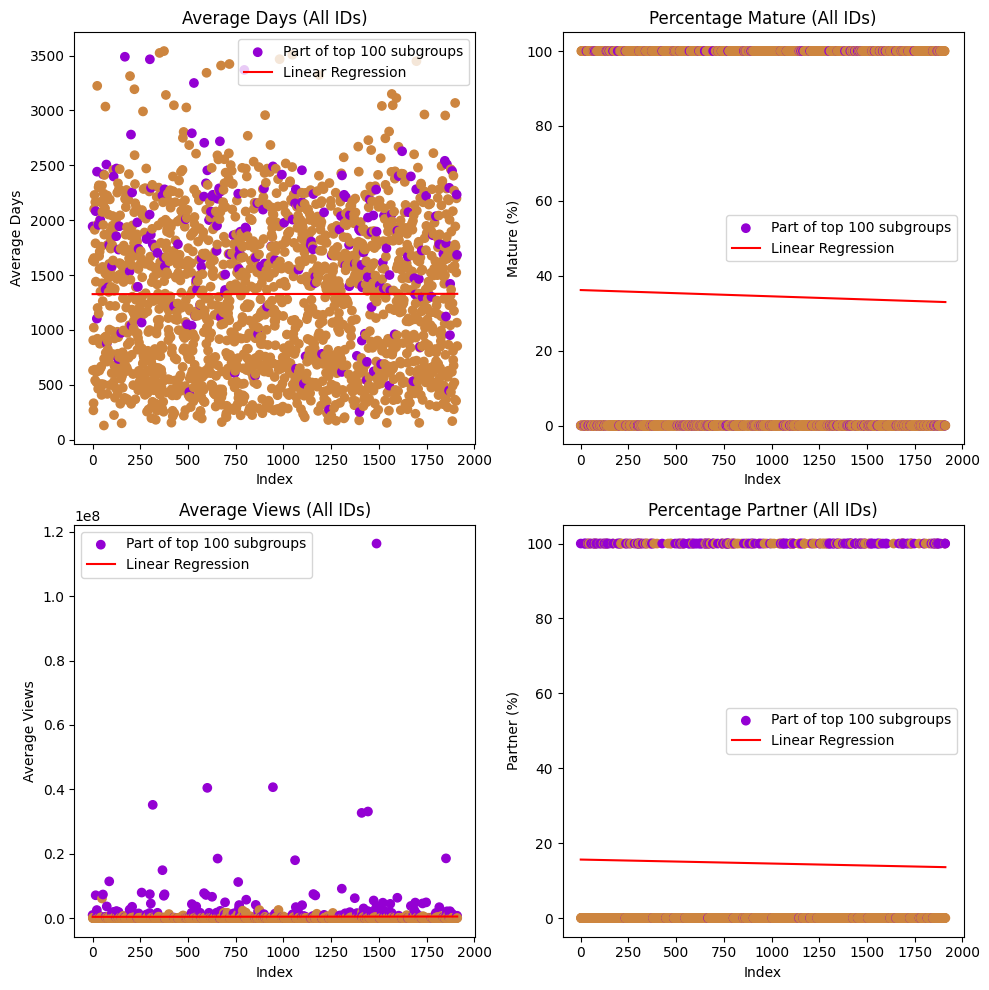

In [54]:
# Make the same plots for all ids in the targets dataframe, with green dots for top 100 subgroup members
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# Prepare data for all ids
all_stats_df = pd.DataFrame({
    'avg_days': targets['days'],
    'percent_mature': targets['mature'] * 100,
    'avg_views': targets['views'],
    'percent_partner': targets['partner'] * 100,
    'new_id': targets['new_id'] if 'new_id' in targets.columns else targets['id']
})

# Get set of all top 100 subgroup member IDs (as integers)
top_100_member_ids = set()
for member_list in top_100_members:
    for member in member_list:
        try:
            top_100_member_ids.add(int(member))
        except ValueError:
            pass

# Create mask for green dots
is_top100 = all_stats_df['new_id'].astype(int).isin(top_100_member_ids)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot 1: Average Days
x1 = range(len(all_stats_df))
y1 = all_stats_df['avg_days']
axs[0, 0].scatter(x1, y1, c=['darkviolet' if flag else 'peru' for flag in is_top100], label='Part of top 100 subgroups')
slope, intercept, r_value, p_value, std_err = linregress(x1, y1)
axs[0, 0].plot(x1, intercept + slope * np.array(x1), color='red', label='Linear Regression')
axs[0, 0].set_title('Average Days (All IDs)')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Average Days')
axs[0, 0].legend()

# Plot 2: Percentage Mature
x2 = range(len(all_stats_df))
y2 = all_stats_df['percent_mature']
axs[0, 1].scatter(x2, y2, c=['darkviolet' if flag else 'peru' for flag in is_top100], label='Part of top 100 subgroups')
slope, intercept, r_value, p_value, std_err = linregress(x2, y2)
axs[0, 1].plot(x2, intercept + slope * np.array(x2), color='red', label='Linear Regression')
axs[0, 1].set_title('Percentage Mature (All IDs)')
axs[0, 1].set_xlabel('Index')
axs[0, 1].set_ylabel('Mature (%)')
axs[0, 1].legend()

# Plot 3: Average Views
x3 = range(len(all_stats_df))
y3 = all_stats_df['avg_views']
axs[1, 0].scatter(x3, y3, c=['darkviolet' if flag else 'peru' for flag in is_top100], label='Part of top 100 subgroups')
slope, intercept, r_value, p_value, std_err = linregress(x3, y3)
axs[1, 0].plot(x3, intercept + slope * np.array(x3), color='red', label='Linear Regression')
axs[1, 0].set_title('Average Views (All IDs)')
axs[1, 0].set_xlabel('Index')
axs[1, 0].set_ylabel('Average Views')
axs[1, 0].legend()

# Plot 4: Percentage Partner
x4 = range(len(all_stats_df))
y4 = all_stats_df['percent_partner']
axs[1, 1].scatter(x4, y4, c=['darkviolet' if flag else 'peru' for flag in is_top100], label='Part of top 100 subgroups')
slope, intercept, r_value, p_value, std_err = linregress(x4, y4)
axs[1, 1].plot(x4, intercept + slope * np.array(x4), color='red', label='Linear Regression')
axs[1, 1].set_title('Percentage Partner (All IDs)')
axs[1, 1].set_xlabel('Index')
axs[1, 1].set_ylabel('Partner (%)')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

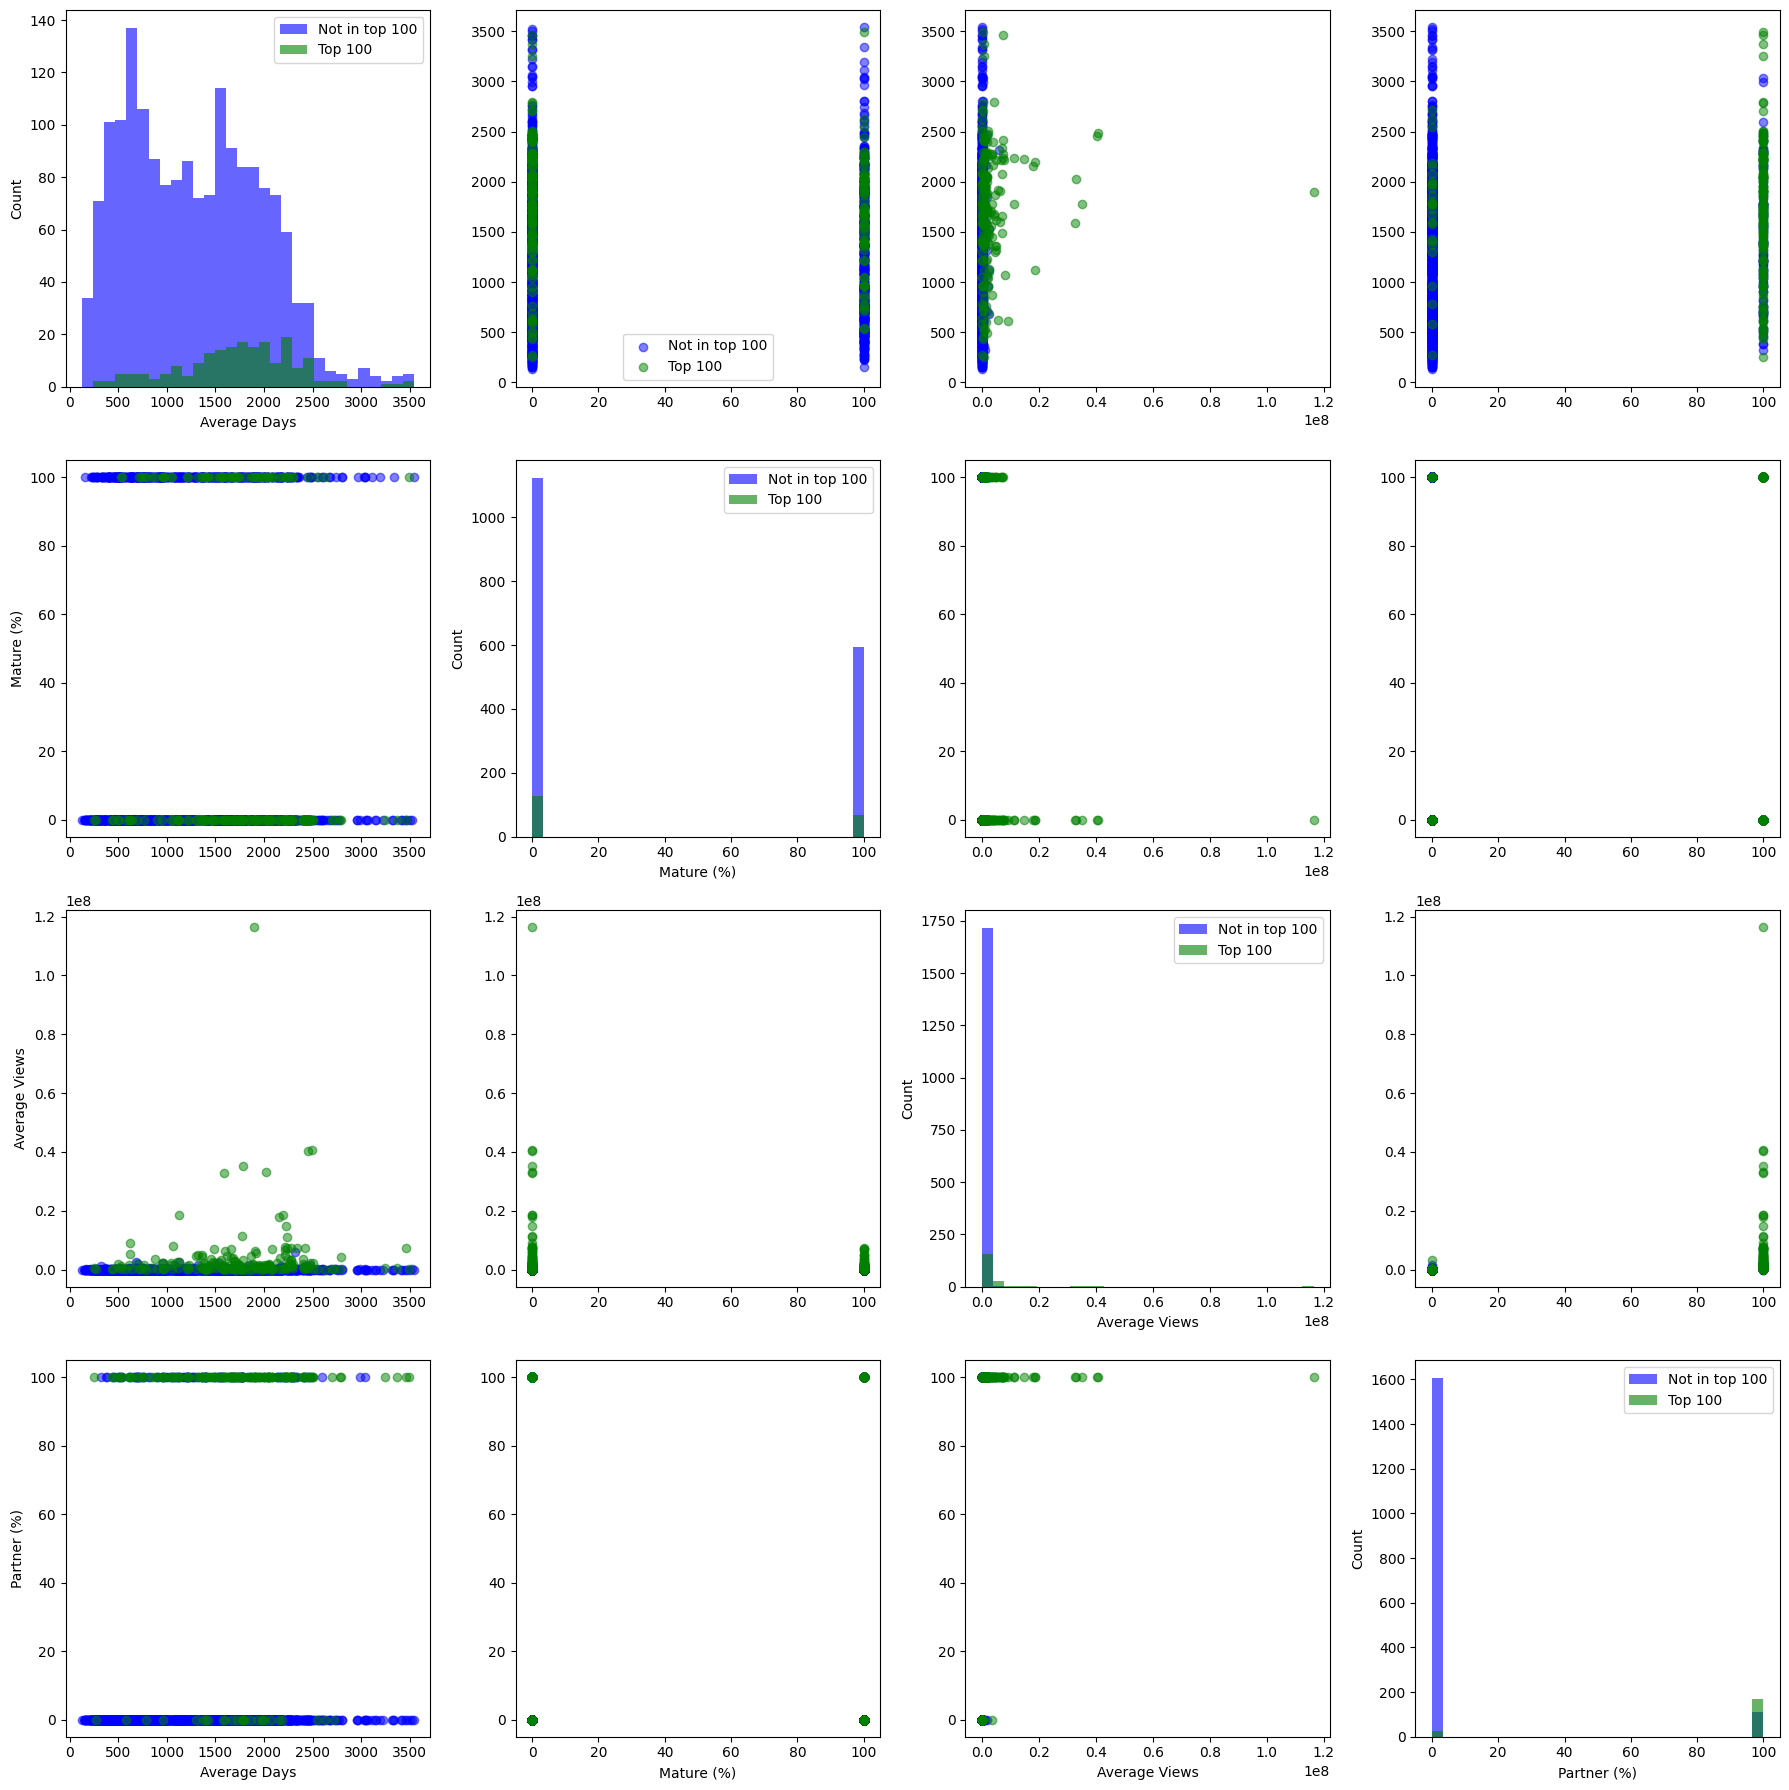

In [55]:
# 4x4 scatter plot matrix with histograms on the diagonal, colored by top 100 subgroup membership
import matplotlib.pyplot as plt
import numpy as np

variables = ['avg_days', 'percent_mature', 'avg_views', 'percent_partner']
labels = ['Average Days', 'Mature (%)', 'Average Views', 'Partner (%)']
data = all_stats_df[variables]

is_top100 = all_stats_df['new_id'].astype(int).isin(top_100_member_ids)

fig, axes = plt.subplots(4, 4, figsize=(18, 18))

for i in range(4):
    for j in range(4):
        ax = axes[i, j]
        if i == j:
            # Histogram: blue for not in top 100, green for in top 100
            vals_all = data[variables[i]][~is_top100]
            vals_top = data[variables[i]][is_top100]
            bins = np.histogram_bin_edges(data[variables[i]], bins=30)
            ax.hist(vals_all, bins=bins, color='blue', alpha=0.6, label='Not in top 100')
            ax.hist(vals_top, bins=bins, color='green', alpha=0.6, label='Top 100')
            ax.set_ylabel('Count')
            ax.set_xlabel(labels[i])
            ax.legend()
        else:
            # Scatter plot: blue for not in top 100, green for in top 100
            x = data[variables[j]]
            y = data[variables[i]]
            ax.scatter(x[~is_top100], y[~is_top100], color='blue', alpha=0.5, label='Not in top 100')
            ax.scatter(x[is_top100], y[is_top100], color='green', alpha=0.5, label='Top 100')
            if j == 0:
                ax.set_ylabel(labels[i])
            if i == 3:
                ax.set_xlabel(labels[j])
            if i == 0 and j == 1:
                ax.legend()

plt.tight_layout()
plt.show()

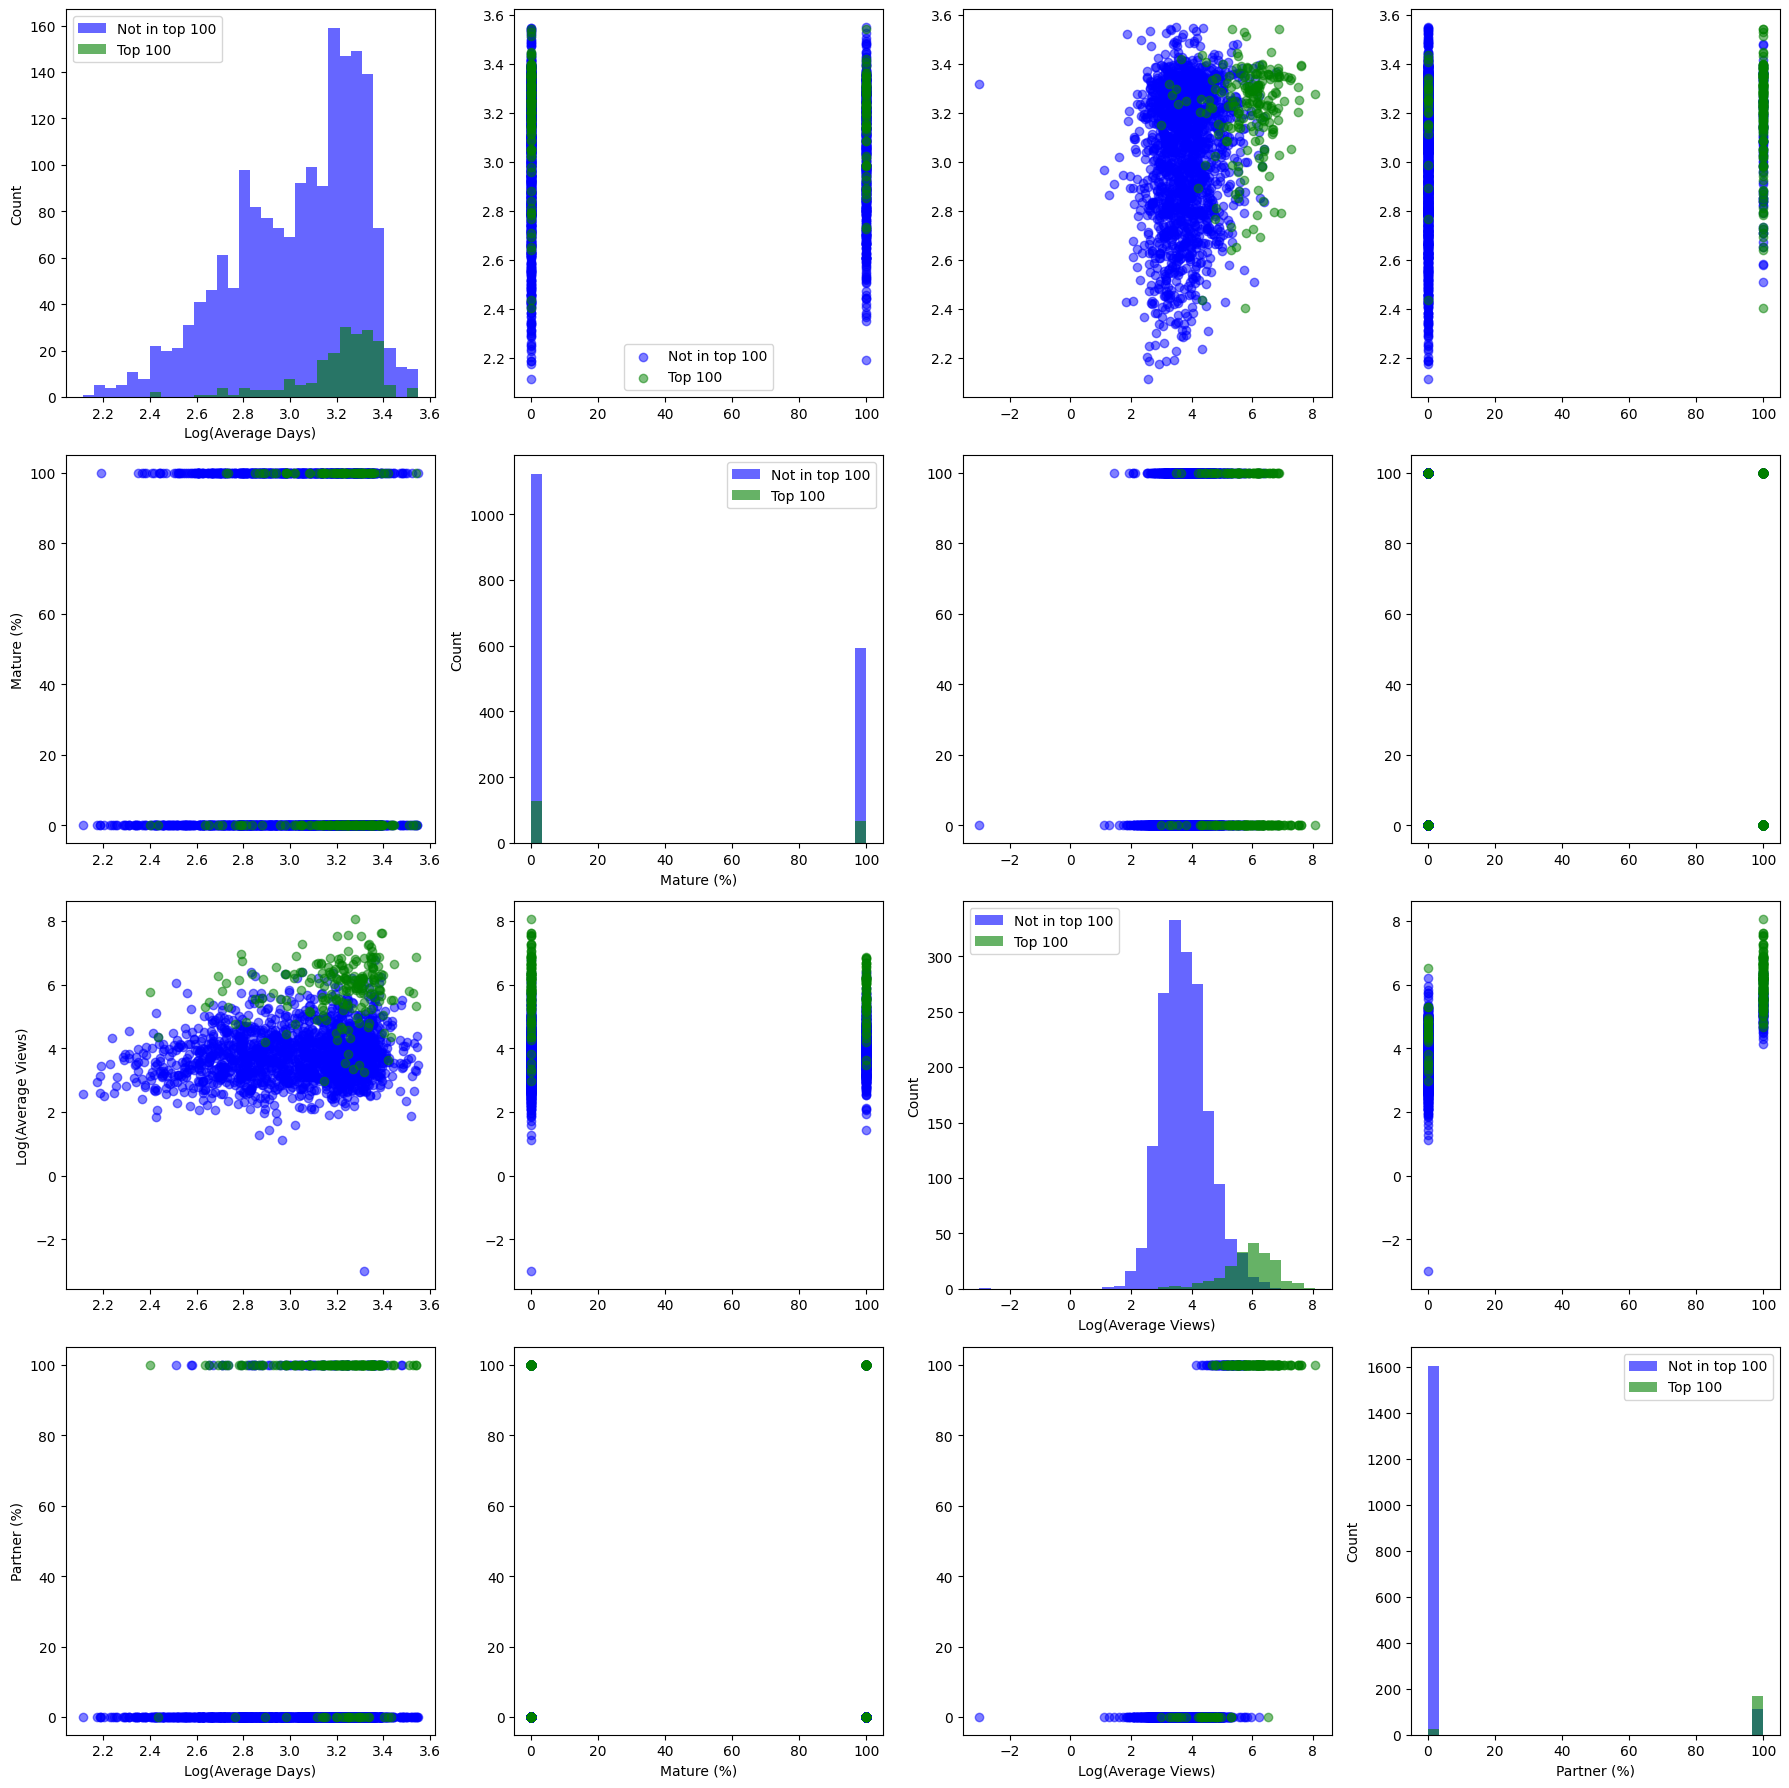

In [56]:
# 4x4 scatter plot matrix with log scale for average views and average days axes
import matplotlib.pyplot as plt
import numpy as np

variables = ['avg_days', 'percent_mature', 'avg_views', 'percent_partner']
labels = ['Average Days', 'Mature (%)', 'Average Views', 'Partner (%)']
data = all_stats_df[variables].copy()

is_top100 = all_stats_df['new_id'].astype(int).isin(top_100_member_ids)

# Apply log10 transform to avg_days and avg_views (add small constant to avoid log(0))
data['avg_days_log'] = np.log10(data['avg_days'] + 1e-3)
data['avg_views_log'] = np.log10(data['avg_views'] + 1e-3)

log_variables = ['avg_days_log', 'percent_mature', 'avg_views_log', 'percent_partner']
log_labels = ['Log(Average Days)', 'Mature (%)', 'Log(Average Views)', 'Partner (%)']

fig, axes = plt.subplots(4, 4, figsize=(18, 18))

for i in range(4):
    for j in range(4):
        ax = axes[i, j]
        if i == j:
            # Histogram: blue for not in top 100, green for in top 100
            vals_all = data[log_variables[i]][~is_top100]
            vals_top = data[log_variables[i]][is_top100]
            bins = np.histogram_bin_edges(data[log_variables[i]], bins=30)
            ax.hist(vals_all, bins=bins, color='blue', alpha=0.6, label='Not in top 100')
            ax.hist(vals_top, bins=bins, color='green', alpha=0.6, label='Top 100')
            ax.set_ylabel('Count')
            ax.set_xlabel(log_labels[i])
            ax.legend()
        else:
            # Scatter plot: blue for not in top 100, green for in top 100
            x = data[log_variables[j]]
            y = data[log_variables[i]]
            ax.scatter(x[~is_top100], y[~is_top100], color='blue', alpha=0.5, label='Not in top 100')
            ax.scatter(x[is_top100], y[is_top100], color='green', alpha=0.5, label='Top 100')
            if j == 0:
                ax.set_ylabel(log_labels[i])
            if i == 3:
                ax.set_xlabel(log_labels[j])
            if i == 0 and j == 1:
                ax.legend()

plt.tight_layout()
plt.show()

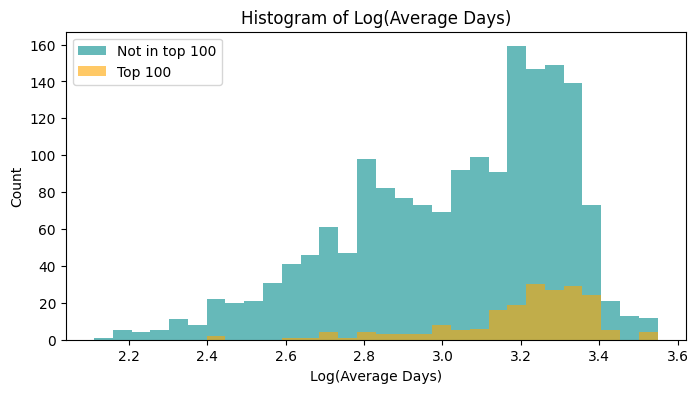

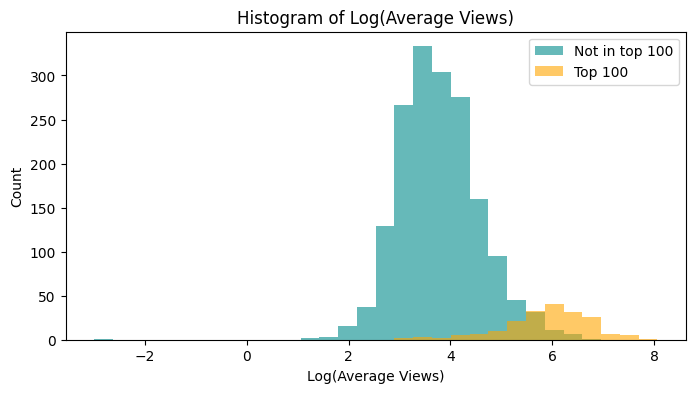

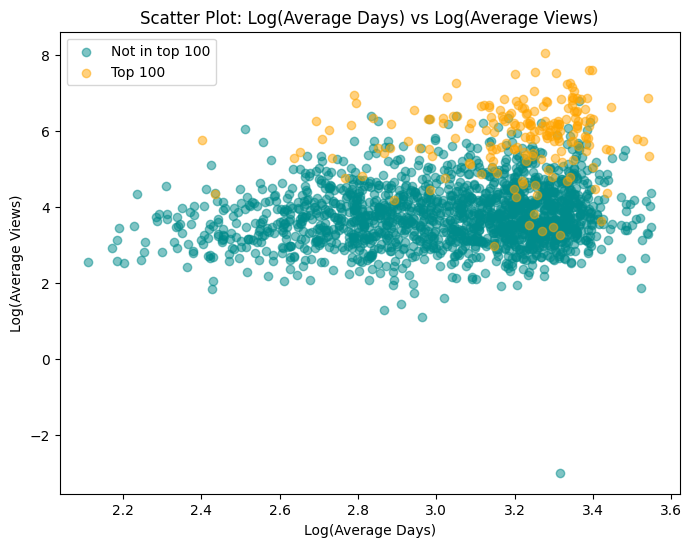

In [ ]:
# Histograms for log(average days) and log(average views), and scatter plot for both, with top 10 highlighted
import matplotlib.pyplot as plt
import numpy as np

# Get set of all top 10 subgroup member IDs (as integers)
top_10_member_ids = set()
for subgroup in top_100_subgroups.head(10)['members']:
    for member in subgroup.replace('[','').replace(']','').replace("'","").split(','):
        member = member.strip()
        try:
            top_10_member_ids.add(int(member))
        except ValueError:
            pass

# Masks for categories
is_top100 = all_stats_df['new_id'].astype(int).isin(top_100_member_ids)
is_top10 = all_stats_df['new_id'].astype(int).isin(top_10_member_ids)

# Histogram for log(average days)
plt.figure(figsize=(8,4))
vals_all = data['avg_days_log'][~is_top100 & ~is_top10]
vals_top100 = data['avg_days_log'][is_top100 & ~is_top10]
vals_top10 = data['avg_days_log'][is_top10]
bins = np.histogram_bin_edges(data['avg_days_log'], bins=30)
plt.hist(vals_all, bins=bins, color='darkcyan', alpha=0.6, label='Not in top 100')
plt.hist(vals_top100, bins=bins, color='orange', alpha=0.6, label='Top 100')
plt.hist(vals_top10, bins=bins, color='blueviolet', alpha=0.6, label='Top 10')
plt.xlabel('Log(Average Days)')
plt.ylabel('Count')
plt.title('Histogram of Log(Average Days)')
plt.legend()
plt.show()

# Histogram for log(average views)
plt.figure(figsize=(8,4))
vals_all = data['avg_views_log'][~is_top100 & ~is_top10]
vals_top100 = data['avg_views_log'][is_top100 & ~is_top10]
vals_top10 = data['avg_views_log'][is_top10]
bins = np.histogram_bin_edges(data['avg_views_log'], bins=30)
plt.hist(vals_all, bins=bins, color='darkcyan', alpha=0.6, label='Not in top 100')
plt.hist(vals_top100, bins=bins, color='orange', alpha=0.6, label='Top 100')
plt.hist(vals_top10, bins=bins, color='blueviolet', alpha=0.6, label='Top 10')
plt.xlabel('Log(Average Views)')
plt.ylabel('Count')
plt.title('Histogram of Log(Average Views)')
plt.legend()
plt.show()

# Scatter plot for log(average days) vs log(average views)
plt.figure(figsize=(8,6))
x = data['avg_days_log']
y = data['avg_views_log']
plt.scatter(x[~is_top100 & ~is_top10], y[~is_top100 & ~is_top10], color='darkcyan', alpha=0.5, label='Not in top 100')
plt.scatter(x[is_top100 & ~is_top10], y[is_top100 & ~is_top10], color='orange', alpha=0.5, label='Top 100')
plt.scatter(x[is_top10], y[is_top10], color='blueviolet', alpha=0.7, label='Top 10')
plt.xlabel('Log(Average Days)')
plt.ylabel('Log(Average Views)')
plt.title('Scatter Plot: Log(Average Days) vs Log(Average Views)')
plt.legend()
plt.show()